# Project description: Identifying types of consumer behavior among customers of on-line store

It is necessary to help on-line store become more efficient. Main goal is to make detailed recommendations to business owners regarding customer segments for further solutions of promotional mailing list.

It is necessary to analyze:
- what customer segment buys often and expensive goods, what segment may not be worth for spending time and money to do promotional mailing.
- to what segment, in what period of time and what categories of goods to send promotional offers.
- how and for what cluster can you try to increase quantity of goods sold, increase customer retention rate, etc.

# Data description:

Dataset describe transactions of on-line store of household goods.

Columns in **ecom_datasheet_pdf.csv** :

- **date** — order date;
- **customer_id** — customer ID;
- **order_id** — order ID;
- **product** — product name;
- **quantity** — quantity of product in order;
- **price** — product price.

# Project navigation

[1. Loading data from CSV files, check general info and preprocess data.](#1.-Loading-data-from-CSV-files,-check-general-info-and-preprocess-data.)

[2. Exploratory data analysis](#2.-Exploratory-data-analysis)
   - [2.1 Calculate general metrics](#2.1-Calculate-general-metrics)
   - [2.2 Calculate order qty per customer](#2.2-Calculate-order-qty-per-customer)
   - [2.3 Calculate product qty per order](#2.3-Calculate-product-qty-per-order)
   - [2.4 Check how average order ticket distributed](#2.4-Check-how-average-order-ticket-distributed)
   - [2.5 Calculate TOP-10 products in turnover and sold qty](#2.5-Calculate-TOP-10-products-in-turnover-and-sold-qty)

[3. Customer segmentation by purchase history](#3.-Customer-segmentation-by-purchase-history)
   - [3.1 Analyze and identify unique products and their qty](#3.1-Analyze-and-identify-unique-products-and-their-qty)
   - [3.2 Split products per categories, creating dictionaries based on key words in product names](#3.2-Split-products-per-categories,-creating-dictionaries-based-on-key-words-in-product-names)
   - [3.3 Calculate products name qty and customer qty per category](#3.3-Calculate-products-name-qty-and-customer-qty-per-category)
   - [3.4 Create customer profiles.](#3.4-Create-customer-profiles.)
   - [3.5 Launch clustering of customer profiles by Kmeans method, adding clusters to initial dataframe](#3.5-Launch-clustering-of-customer-profiles-by-Kmeans-method,-adding-clusters-to-initial-dataframe)
   - [3.6 Look at revenue, order qty and customers dynamic by product categories](#3.6-Look-at-revenue,-order-qty-and-customers-dynamic-by-product-categories)
       - [3.6.1 Look at avg order ticket by product categories](#3.6.1-Look-at-avg-order-ticket-by-product-categories)
       - [3.6.2 Look at product qty by categories](#3.6.2-Look-at-product-qty-by-categories)
       - [3.6.3 Calculate total revenue and total sold pcs](#3.6.3-Calculate-total-revenue-and-total-sold-pcs)
       - [3.6.4 Look at revenue dynamic by categories](#3.6.4-Look-at-revenue-dynamic-by-categories)

[4. Testing statistical hypotheses of equality between average tickets, product price among clusters](#4.-Testing-statistical-hypotheses-of-equality-between-average-tickets,-product-price-among-clusters)

[Main summary](#Main-summary)

[Recommendations](#Recommendations)




## 1. Loading data from CSV files, check general info and preprocess data.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns; sns.set()
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from pymystem3 import Mystem
from sklearn.cluster import KMeans

In [2]:
e_comm_platform = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')

In [3]:
#  writing a function to display general information
def display_general_info(df):
    df.info()
    display(df.head())
    display(df.describe())
    display(df.duplicated().sum())
    display(pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm'))

In [4]:
display_general_info(e_comm_platform)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


,date,order_id,quantity,price
count,7.474000e+03,7474.000000,7474.000000,7474.000000
mean,2.018913e+09,49449.884265,2.362858,478.737501
std,4.278878e+05,32679.642404,14.500497,901.615895
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019022e+09,14833.000000,1.000000,97.000000
50%,2.019051e+09,68768.000000,1.000000,135.000000
75%,2.019063e+09,71257.750000,1.000000,439.000000
max,2.020013e+09,112789.000000,1000.000000,14917.000000


0

,0
date,0.000000
customer_id,0.000000
order_id,0.000000
product,0.000000
quantity,0.000000
price,0.000000


Based on general info overview, there is no explicit duplicated;missing values;data types are correct except date - change this format to datetime;total rows are 7474. 

In [5]:
# change type of date column to datetime and add month column
e_comm_platform['date'] = pd.to_datetime(e_comm_platform['date'], format='%Y%m%d%H%M')
e_comm_platform['month'] = e_comm_platform['date'].astype('datetime64[M]') 

In [6]:
# check duplicated values per order and per customer at once
e_comm_platform[e_comm_platform.duplicated(subset=['customer_id', 'order_id', 'product'])].count()

date           1886
customer_id    1886
order_id       1886
product        1886
quantity       1886
price          1886
month          1886
dtype: int64

Here are 1886 duplicates, look at this data

In [7]:
# sorting data by order_id and product
e_comm_platform[e_comm_platform.duplicated(subset=['customer_id', 'order_id', 'product'])].sort_values(by=['order_id', 'product'],ascending=True).head(20)

,date,customer_id,order_id,product,quantity,price,month
376,2018-10-23 01:03:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-10-01
509,2018-10-28 01:09:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-10-01
588,2018-11-02 01:04:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-11-01
758,2018-11-10 01:07:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-11-01
816,2018-11-15 01:05:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-11-01
827,2018-11-16 01:06:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-11-01
377,2018-10-23 01:03:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,2018-10-01
510,2018-10-28 01:09:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,2018-10-01
589,2018-11-02 01:04:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,2018-11-01
759,2018-11-10 01:07:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,2018-11-01


There are orders repeated several times, but with different dates. We save only first orders by date, and delete the rest. It is possible that client incorrectly upload data from their accounting system.

In [8]:
e_comm_platform.drop_duplicates(subset=['customer_id', 'order_id', 'product'], keep='first', inplace=True)

In [9]:
# check data again
e_comm_platform[e_comm_platform.duplicated(subset=['customer_id', 'order_id', 'product'])].sum()

date           0.0
customer_id    0.0
order_id       0.0
product        0.0
quantity       0.0
price          0.0
month          0.0
dtype: float64

In [10]:
e_comm_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5588 entries, 0 to 7473
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5588 non-null   datetime64[ns]
 1   customer_id  5588 non-null   object        
 2   order_id     5588 non-null   int64         
 3   product      5588 non-null   object        
 4   quantity     5588 non-null   int64         
 5   price        5588 non-null   float64       
 6   month        5588 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 349.2+ KB


After duplicate removing, here are 5588 rows.

Look again at distribution of numeric data in columns after removing duplicates.

In [11]:
e_comm_platform.describe()

,order_id,quantity,price
count,5588.000000,5588.000000,5588.000000
mean,56044.164102,2.604331,531.285448
std,32374.942495,16.448966,973.230484
min,12624.000000,1.000000,9.000000
25%,14814.000000,1.000000,90.000000
50%,69227.500000,1.000000,150.000000
75%,71934.500000,1.000000,524.000000
max,112789.000000,1000.000000,14917.000000


Column with quantity has value in 1000 pieces of 1 product name in order - it is necessary to check what kind of product it is, perhaps it is anomaly. 

Average price for 1 product is 530 rubles, median value is much lower-150 rubles. Most expensive purchase occurred for 14,917 rubles. Such a large spread may be justified by large difference in the functionality of product.

In [12]:
e_comm_platform[e_comm_platform['quantity']==1000]

,date,customer_id,order_id,product,quantity,price,month
5456,2019-06-18 01:05:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019-06-01


Order for 1000 plungers looks like a test order, or errored order. Let's delete it from  dataset.

In [13]:
e_comm_platform = e_comm_platform.drop(e_comm_platform[e_comm_platform['customer_id'] == '312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6'].index)

In [14]:
# check that we deleted order with 1000 plungers
e_comm_platform[e_comm_platform['customer_id'] == '312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6']

,date,customer_id,order_id,product,quantity,price,month


In [15]:
# check unique orders with several customer_id
filtered_data = e_comm_platform.groupby('order_id')['customer_id'].nunique().sort_values(ascending=False).reset_index()
filtered_data.head(30)

,order_id,customer_id
0,72845,4
1,69485,3
2,71480,3
3,72790,2
4,71226,2
5,70946,2
6,70631,2
7,71571,2
8,71461,2
9,71054,2


In [16]:
filtered_data_l = filtered_data.loc[filtered_data['customer_id'] > 1]
filtered_data_l = list(filtered_data_l['order_id'])

In [17]:
# delete it from dataframe
e_comm_platform = e_comm_platform[e_comm_platform['order_id'].isin(filtered_data_l)==False].reset_index(drop=True)
e_comm_platform[e_comm_platform['order_id']==72845]

,date,customer_id,order_id,product,quantity,price,month


**Section summary:**

1. Identified duplicated orders, deleted duplicates from the dataset. There are 5,588 lines left out of the original 7474.
2. Converted date to the datetime type, allocated month to separate column.
3. Anomaly has been identified with orders of 1000 pieces of one article.
4. No missing values or explicit duplicates have been identified.

## 2. Exploratory data analysis

### 2.1 Calculate general metrics

In [18]:
print('Total unique customers: {:.0f}'.format(len(e_comm_platform['customer_id'].unique())))
print('Total unique products: {:.0f}'.format(len(e_comm_platform['product'].unique())))
print('Total unique orders: {:.0f}'.format(len(e_comm_platform['order_id'].unique())))

Total unique customers: 2412
Total unique products: 2333
Total unique orders: 3491


### 2.2 Calculate order qty per customer

In [19]:
abc = e_comm_platform.groupby('customer_id')['order_id'].nunique().reset_index()

print('Customer qty who made order: ', 
      abc[abc['order_id'] == 1].shape[0], 
      '\n', 
      '% from total order qty: {:.2%}'.format(abc[abc['order_id'] == 1].shape[0] / abc.shape[0])
     )

Customer qty who made order:  1539 
 % from total order qty: 63.81%


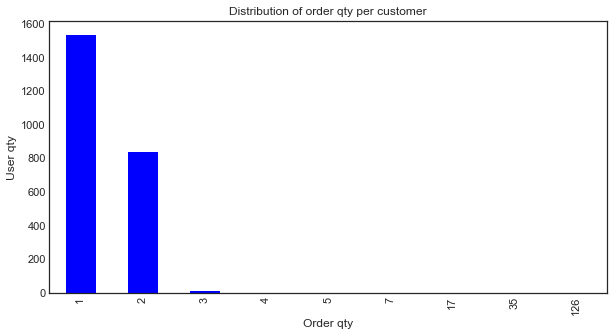

In [20]:
# grouping data andwe visualize it using bar chart
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-white')
e_comm_platform.groupby('customer_id')['order_id'].nunique().value_counts().sort_index().plot(kind='bar', color='blue', grid=False)

plt.xlabel('Order qty')
plt.ylabel('User qty')
plt.title('Distribution of order qty per customer')
plt.show()

In [21]:
e_comm_platform.groupby('customer_id')['order_id'].nunique().sort_values(ascending=False).head(10)

customer_id
c971fb21-d54c-4134-938f-16b62ee86d3b    126
4d93d3f6-8b24-403b-a74b-f5173e40d7db     35
73d1cd35-5e5f-4629-8cf2-3fda829d4e58     17
b7b865ab-0735-407f-8d0c-31f74d2806cc      7
0184f535-b60a-4914-a982-231e3f615206      5
498f12a4-6a62-4725-8516-cf5dc9ab8a3a      4
e0535076-6270-4df2-8621-cb06264a94fa      4
bea7a833-2074-42db-bc49-4457abd3c930      4
e8204583-4d55-4724-ad3f-049c7db43bdd      3
a9089b7e-e6a5-48f9-9b76-48693b63a092      3
Name: order_id, dtype: int64

In [22]:
# remove customers with orders more than 7 - there are only 3
users_to_remove = ['4d93d3f6-8b24-403b-a74b-f5173e40d7db', '73d1cd35-5e5f-4629-8cf2-3fda829d4e58', 'c971fb21-d54c-4134-938f-16b62ee86d3b']

e_comm_platform = e_comm_platform[~e_comm_platform['customer_id'].isin(users_to_remove)]

In [23]:
# check data after removing customers with order qty higher than 7
e_comm_platform.groupby('customer_id')['order_id'].nunique().sort_values(ascending=False).head(20)

customer_id
b7b865ab-0735-407f-8d0c-31f74d2806cc    7
0184f535-b60a-4914-a982-231e3f615206    5
498f12a4-6a62-4725-8516-cf5dc9ab8a3a    4
bea7a833-2074-42db-bc49-4457abd3c930    4
e0535076-6270-4df2-8621-cb06264a94fa    4
dfbcfde5-21de-4504-aff4-453e617d81c1    3
639c4989-b0ab-412a-b7ec-be394cb2d372    3
d02429ab-22e0-4ff2-9465-3082befde444    3
41117d9d-94f7-4145-a8c9-cb6675ce7674    3
62952c5b-e5ef-4009-a2f9-1ebff401c514    3
0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e    3
6a86cc77-ef15-496f-b5d3-89005597ee5d    3
6b0c6cfb-7717-4c34-8535-bbc6e2b2c758    3
0adba506-249c-40b5-839d-a59d7a275cd7    3
e8204583-4d55-4724-ad3f-049c7db43bdd    3
4856a2a7-b9d2-4243-b8d9-a96ec1425bbe    3
a9089b7e-e6a5-48f9-9b76-48693b63a092    3
d16fbc13-50a6-4dea-aafc-bc197aafc9e4    3
ff422162-fc4a-4b65-a0e2-17f5095ea2c6    3
f163e581-59ba-4022-99db-e0973c7497c0    3
Name: order_id, dtype: int64

We can see that main part of customers placed order at once (63%), 2 orders are almost half from customer qty who made 1 order. There are 126, 35 and 17 orders placed by 1 customer, perhaps they are wholesalers and ordering on a regular basis. But, we will delete them for not distorting results of subsequent clustering.

### 2.3 Calculate product qty per order

In [24]:
data = e_comm_platform.groupby('order_id').agg({'product': 'nunique'}).reset_index()

print('Product qty per order: ', 
      data[data['product'] == 1].shape[0], 
      '\n', 
      '% from total order qty: {:.2%}'.format(data[data['product'] == 1].shape[0] / data.shape[0])
     )

Product qty per order:  2924 
 % from total order qty: 88.26%


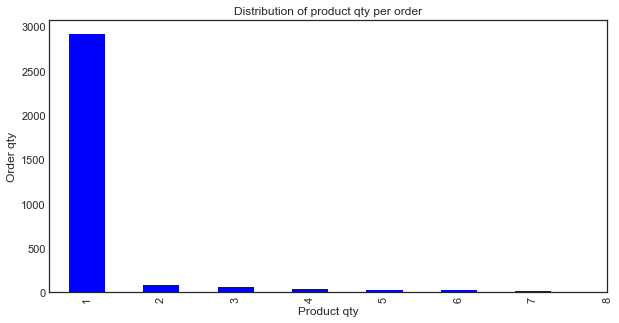

In [25]:
# visualize it using bar chart
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-white')
e_comm_platform.groupby('order_id')['product'].nunique().value_counts().sort_index().plot(kind='bar', color='blue', grid=False)


plt.xlabel('Product qty')
plt.ylabel('Order qty')
plt.title('Distribution of product qty per order')
plt.xlim(-0.5, 7) # limit list of products on X axis
plt.show()

Vast majority of orders contain one product name - 88% out of total qty of orders. Maximum number of items in order is 51, there is only one.

### 2.4 Check how average order ticket distributed

In [26]:
# firstly, calculate price of 1 product per order
e_comm_platform['turnover'] = e_comm_platform['quantity']*e_comm_platform['price']

# groupng data by orders
basket_size = e_comm_platform.groupby('order_id')['turnover'].sum().reset_index()
basket_size.describe()

,order_id,turnover
count,3313.000000,3313.000000
mean,73813.890733,1109.746277
std,24018.832341,2116.035199
min,12624.000000,9.000000
25%,69556.000000,187.000000
50%,71294.000000,563.000000
75%,72953.000000,1213.000000
max,112789.000000,49432.000000


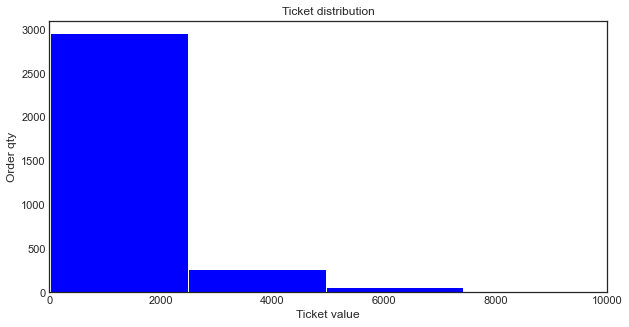

In [27]:
# visualize ticket distribution by orders
plt.style.use('seaborn-white')
basket_size['turnover'].plot(kind='hist',bins=20,color='blue', figsize=(10,5),grid=False)

plt.xlim(0,10000) # limit data on X axis
plt.xlabel('Ticket value')
plt.ylabel('Order qty')
plt.title('Ticket distribution')
plt.show()

In [28]:
# find a product which costs more than 10 000 rub.
e_comm_platform['price'].max()

14917.0

In [29]:
print(np.percentile(basket_size['turnover'], [95, 99])) 

[3749.   7584.88]


As we can see, average ticket is around 1200 rubles, while 75% of percentiles have ticket up to 1300 rubles. Limit for expensive products is on 8000 rubles, but there is product worth 14917 rubles in the dataset. Let's cut off data all to 15,000 rubles.

In [30]:
# avearge ticket order per customer
avg_ticket_outliers = e_comm_platform.groupby('customer_id').agg({'order_id': 'nunique', 'turnover': 'sum'}).reset_index()
avg_ticket_outliers.columns = ['customer_id','total_orders', 'total_turnover']
avg_ticket_outliers['avg_order_value'] = avg_ticket_outliers['total_turnover'] / avg_ticket_outliers['total_orders']
# filttering average tickets which higher than 15 000 rub.
avg_ticket_outliers = avg_ticket_outliers[avg_ticket_outliers['avg_order_value'] >= 15000]
# create list of customers who has average tickets higher than 15 000 rub.
customer_outliers  = list(avg_ticket_outliers['customer_id'])
customer_outliers

['146cd9bf-a95c-4afb-915b-5f6684b17444',
 '1b2764ad-9151-4051-a46a-9b01b62e6335',
 '58a4c3cc-504f-43ea-a74a-bae19e665552',
 '5d189e88-d4d6-4eac-ab43-fa65a3c4d106',
 '6987e6d6-a63a-4ce2-a2d0-f424092d235e',
 '8fba3604-ef57-4b9f-b2fe-3402fa8825c8',
 '909564b8-3a5c-4d3e-8310-5ba1c837bbd7',
 '9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f']

In [31]:
# remove customers with average tickets higher than 15000 rub from initial dataframe
e_comm_platform = e_comm_platform[~e_comm_platform['customer_id'].isin(customer_outliers)]

### 2.5 Calculate TOP-10 products in turnover and sold qty

In [32]:
top_10_products = e_comm_platform.groupby('product')[['quantity','turnover']].agg('sum','sum')

# TOP-10 products in volume
print('TOP-10 products in volume:')
print(top_10_products.sort_values(by='quantity', ascending=False).head(10).to_string())

# TOP-10 products in value
print('\nTOP-10 products in value:')
print(top_10_products.sort_values(by='turnover', ascending=False).head(10).to_string())

TOP-10 products in volume:
                                                                      quantity  turnover
product                                                                                 
Муляж ЯБЛОКО 9 см красное                                                  318   17402.0
Ручка-скоба РС-100 белая *Трибатрон*, 1108035                              201    5829.0
Крепеж для пружины дверной, 1107055                                        170    3290.0
Плечики пластмассовые Размер 52 - 54 Тула 1205158                          160    3210.0
Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014       150    5700.0
Муляж Яблоко зеленый 9 см полиуретан                                       148    8132.0
Муляж Банан желтый 21 см полиуретан                                        109    5831.0
Щетка для посуды *ОЛЯ*, Мультипласт 1807010                                101    2626.0
Щетка для мытья посуды КОЛИБРИ М5202 большая                               100    3

Best-selling product in volume is dummy Apple 9 cm red, in value - a shopping cart.

**Section summary:**
1. main part of customers placed order at once (63%), 2 orders are almost half from customer qty who made 1 order. There are 126, 35 and 17 orders placed by 1 customer, perhaps they are wholesalers and ordering on a regular basis.
2. Vast majority of orders contain one product name - 88% out of total qty of orders. Maximum number of items in order is 51, there is only one.
3. average ticket is around 1200 rubles, while 75% of percentiles have ticket up to 1300 rubles. Limit for expensive products is on 8000 rubles, but there is product worth 14 917 rubles in the dataset.
4. Best-selling product in volume is dummy Apple 9 cm red, in value - a shopping cart.
5. Outliers were removed for average check above 15,000 rubles (8 users).

## 3. Customer segmentation by purchase history

### 3.1 Analyze and identify unique products and their qty

In [33]:
# unique product qty
e_comm_platform['product'].nunique()

2246

In [34]:
# forming data for dictionary
e_comm_platform['product_name'] = e_comm_platform['product'].apply(lambda x: x.split()[:1]).str.join(', ')
e_comm_platform.head(10)

,date,customer_id,order_id,product,quantity,price,month,turnover,product_name
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,142.0,Комнатное
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,194.0,Комнатное
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,112.0,Радермахера
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,179.0,Хризолидокарпус
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,112.0,Циперус
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,2018-10-01,164.0,Шеффлера
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,2018-10-01,134.0,Юкка
7,2018-10-01 00:08:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,2018-10-01,824.0,Настенная
8,2018-10-01 00:08:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0,2018-10-01,269.0,Таз
10,2018-10-01 01:01:00,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,Вешалка для брюк металлическая с резиновым пок...,10,82.0,2018-10-01,820.0,Вешалка


In [35]:
e_comm_platform['product_name'].unique()

array(['Комнатное', 'Радермахера', 'Хризолидокарпус', 'Циперус',
       'Шеффлера', 'Юкка', 'Настенная', 'Таз', 'Вешалка', 'Сушилка',
       'Крючок', 'Корзина', 'Мини-сковорода', 'Сковорода', 'Стеклянная',
       'Доска', 'Многолетнее', 'Рассада', 'Муляж', 'Сумка', 'Тарелка',
       'Ерш', 'Пеларгония', 'Котел', 'Суккулент', 'Эхеверия', 'Коврик',
       'Подкладка', 'Набор', 'Дозатор', 'Ёрш', 'Нож', 'Эвкалипт',
       'Цветок', 'Сумка-тележка', 'Герань', 'Плед', 'Скатерть', 'Кувшин',
       'Вилка', 'Ложка', 'Адиантум', 'Ковер', 'Перчатки', 'Стремянка',
       'Гладильная', 'Лестница-стремянка', 'Толкушка', 'Искусственный',
       'Банка', 'Комплект', 'Стяжка', 'Кампанула', 'Тележка', 'Противень',
       'Калатея', 'Нолина', 'Плечики', 'Подушка', 'Полотенце',
       'Хлорофитум', 'Цикламен', 'Крепеж', 'Пружина', 'Глоксиния',
       'Азалия', 'Гортензия', 'Хризантема', 'Салфетка', 'Чехол',
       'Вкладыши', 'Миксер', 'Кофр', 'Стиральный', 'Чистящий',
       'Tepмокружка', 'Щетка', 'Ми

In [36]:
# how many uniqie product names
e_comm_platform['product_name'].nunique()

449

Based on 449 keywords, we will create 6 categories (dictionaries) for adding it to general dataset

### 3.2 Split products per categories, creating dictionaries based on key words in product names

In [37]:
cookware = ["Мини-сковорода", "Сковорода", "Стеклянная", "Тарелка", "Вилка", "Ложка", "Нож", "Котел", "Кувшин", "Толкушка", 
    "Чайник", "Банка", "Противень", "Миксер", "Tepмокружка", "Ножеточка", "Сервировочная", "Салатник", "Чайный", 
    "Рыбочистка", "Овощеварка", "Терка", "Кружка", "Лопатка", "Стакан", "Столовая", "Чайная", "Овощечистка", 
    "Измельчитель", "Губка", "Мантоварка", "Кухонные", "Картофелемялка", "Жестяная", "Термостакан", "Термокружка", 
    "Термос", "Фарфоровая", "Электроштопор", "Столовый", "Блюдце", "Разделочная", "Мантоварка-пароварка", "Емкость", 
    "Модульная", "Просеиватель", "Кастрюля", "Хлебница", "Кофе", "Форма", "Орехоколка", "Скалка", "Рукав", "Венчик", 
    "Сито", "Блюдо", "Сменная", "Сотейник", "Отделитель", "Шприц", "Крышка", "Сахарница", "Соковарка", "Пьезозажигалка", 
    "Соковыжималка", "Запасная", "Щётка", "Универсальный", "Половник", "Кипятильник", "Мерный"]

In [38]:
interior_textile = ["Плед", "Скатерть", "Ковер", "Готовая", "Простыня", "Штора", "Подушка", "Полотенце", "Салфетка", "Светильник",
    "Ковёр", "Карниз", "Подголовник", "Наматрасник", "Наматрицник-чехол", "Халат", "Салфетница", "Комод", "Сетка",
    "Покрывало", "Весы", "Одеяло", "Фоторамка", "Простынь", "Махровое", "Нетканые", "Пылесос", "Кухонное", 
    "Махровый", "Ткань", "Наматрацник", "Наволочка", "Пододеяльник", "Ваза", "Двуспальное"]

In [39]:
laundry_bathroom = ["Настенная", "Таз", "Чехол", "Сушилка", "Доска", "Щетка-сметка", "Ерш", "Набор", "Коврик", "Подкладка", 
    "Дозатор", "Ёрш", "Гладильная", "Комплект", "Стиральный", "Чистящий", "Щетка", "Щетка-утюжок", "Жидкое", 
    "Пена", "Подрукавник", "Зубная", "Веник", "Швабра", "Насадка", "Настольная", "Утюг", "Мыло", "Сметка", 
    "Средство", "Паста", "Антижир", "Универсальное", "Ароматизированное", "Бальзам", "Ополаскиватель", 
    "Мыльница", "Вантуз", "Защитная", "Гипоаллергенный", "Совок", "Насадка-отжим", "Штанга", "Увлажняющая", 
    "Мыло-скраб", "Окномойка", "Насадка-моп", "Автоматическая", "Тряпкодержатель", "Бельевые", "Отжим", 
    "Шпагат", "Складной", "Ванна", "Прищепки", "Покрытие", "Отбеливатель", "Тряпка"]

In [40]:
plants = ["Комнатное", "Радермахера", "Хризолидокарпус", "Циперус", "Шеффлера", "Юкка", "Многолетнее", "Рассада", 
    "Муляж", "Герань", "Пеларгония", "Суккулент", "Эхеверия", "Эвкалипт", "Цветок", "Адиантум", "Искусственный", 
    "Кампанула", "Декоративная", "Калатея", "Нолина", "Хлорофитум", "Цикламен", "Глоксиния", "Азалия", "Гортензия", 
    "Хризантема", "Мирт", "Цветущее", "Кориандр", "Иссоп", "Сантолина", "Аспарагус", "Афеляндра", "Антуриум", 
    "Молодило", "Фиалка", "Гербера", "Душица", "Мелисса", "Роза", "Бегония", "Розмарин", "Альбука", "Бальзамин", 
    "Крассула", "Артемизия", "Лаванда", "Мята", "Каланхое", "Примула", "Дендробиум", "Калоцефалус", "Каллуна", 
    "Капсикум", "Мимоза", "Соланум", "Бархатцы", "Космея", "Морковь", "Настурция", "Огурец", "Петуния", 
    "Алиссум", "Гвоздика", "Годеция", "Календула", "Капуста", "Кореопсис", "Лапчатка", "Львиный", "Флокс", 
    "Цинерария", "Эшшольция", "Диффенбахия", "Фаленопсис", "Подсолнечник", "Пуансетия", "Гиностемма", "Ель", 
    "Кипарисовик", "Аптения", "Новогоднее", "Пуансеттия", "Скиммия", "Фиттония", "Тимьян", "Бульонница", "Алоэ", 
    "Спатифиллум", "Фикус", "Искусственная", "Кодонанта", "Цикламен", "Гимнокалициум", "Эхинокактус", "Крокусы", 
    "Гипсофила", "Подарочный", "Калибрахоа", "Эпипремнум", "Аквилегия", "Базилик", "Горох", "Земляника", 
    "Незабудка", "Седум", "Томат", "Укроп", "Нефролепис", "Калла", "Декабрист", "Тюльпан", "Гиацинт", "Вербена", 
    "Однолетнее", "Чабер", "Бакопа", "Ранункулус", "Газания", "Овсянница", "Концентрат", "Тортница", "Георгина", 
    "Смолевка", "Цинния", "Лавр", "Вербейник", "Виола", "Колокольчик", "Котовник", "Эхинацея", "Ясколка", "Лилейник", 
    "Папоротник", "Платикодон", "Энотера", "Фуксия", "Цитрофортунелла", "Пеперомия", "Дыня", "Циния", "Синнингия", 
    "Гардения", "Томата", "Лобелия", "Подвесное", "Табак", "Девичий", "Мускари", "Пиретрум", "Агератум", "Колеус", 
    "Тагетис", "Цинерания", "Муррайя", "Портулак", "Астра", "Аргирантерум", "Левкой", "Вероника", "Целозия", "Арбуз", 
    "Баклажан", "Клубника", "Патиссон", "Маттиола", "Сальвия", "Лук", "Джункус", "Драцена", "Фатсия", "Хоста", 
    "Гайлардия", "Монарда", "Нивянник", "Рудбекия", "Барвинок", "Осина", "Сциндапсус", "Пряные", "Бузульник", 
    "Камнеломка", "Солидаго", "Физостегия", "Бадан", "Лен", "Антинакипин", "Лантана", "Лаватера", "Анемона", 
    "Буддлея", "Валериана", "Змееголовник", "Любисток", "Петрушка", "Сельдерей", "Шалфей", "Вигна", "Кабачок", 
    "Тыква", "Хамедорея", "Зверобой", "Мединилла", "Импатиенс", "Клен", "Замиокулькас", "Амариллис", "Салат", 
    "Пахира", "Литопс", "томата"]

In [41]:
storage = ["Вешалка", "Крючок", "Корзина", "Мусорный", "Стремянка", "Лестница-стремянка", "Стяжка", "Плечики", 
    "Крепеж", "Пружина", "Петля", "Вкладыши", "Кофр", "Стремянки", "Сверло-фреза", "Контейнер", "Ящик", 
    "Ведро", "Короб", "Коробка", "Вешалка-плечики", "Сиденье", "Урна", "Вешалка-стойка", "Держатель", 
    "Пробка", "Лоток", "Вешалки", "Ролик", "Сменный", "Ковш", "Подставка", "Вешалка-сушилка", 
    "Стремянка-табурет", "Кольца", "Этажерка", "Полки", "Складная", "Вешалка-перекладина", "Лестница", 
    "Фал", "Бак", "Полка", "Урна-пепельница", "Обувница-3", "Стеллаж", "Бидон", "Корзинка", "Веревка", 
    "Мешок", "Завертка", "Ручка", "Решетка", "Уголок", "Вакуумный", "Основание", "Стяжки", "Шпингалет"]

In [42]:
tools_bags = ["Сумка-тележка", "Сумка", "Перчатки", "Тележка", "Масленка", "Корыто", "Холодная", "Шнур", "Измерительный",
    "Линейка", "Бензин", "Петля-стрела", "Фен", "Термометр", "Шило", "Кисточка", "Скребок", "Рассекатель",
    "Миска", "Ручка-скоба", "Пресс", "Защитный", "Многофункциональный", "Кондиционер", "Ключница", 
    "Штангенциркуль", "Сверло", "Фиксатор-шар"]

In [43]:
# apply above categories to dataframe through function
def categories(row):   
    for i in cookware:
        if i in row:
            return "Cookware"

    for i in interior_textile:
        if i in row:
            return "Interior_textile"

    for i in laundry_bathroom:
        if i in row:
            return "Laundry_bathroom"

    for i in plants:
        if i in row:
            return "Plants_and_seeds"
        
    for i in storage:
        if i in row:
            return "Storage"
        
    for i in tools_bags:
        if i in row:
            return "Tools_bags"


e_comm_platform['categories'] = e_comm_platform['product'].apply(categories)

In [44]:
# remove column product_name and display first 5 rows of dataframe
e_comm_platform = e_comm_platform.drop('product_name', axis=1)
e_comm_platform.head()

,date,customer_id,order_id,product,quantity,price,month,turnover,categories
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,142.0,Plants_and_seeds
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,194.0,Cookware
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,112.0,Plants_and_seeds
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,179.0,Plants_and_seeds
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,112.0,Plants_and_seeds


### 3.3 Calculate products name qty and customer qty per category

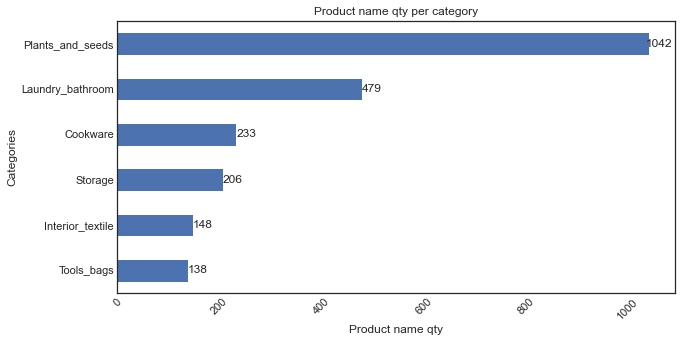

In [45]:
plt.style.use('seaborn-white')
ax = e_comm_platform.groupby('categories')['product'].nunique().sort_values(ascending=True).plot(kind='barh',legend=False, grid=False, figsize=(10,5))

# add values on barchart
for p in ax.patches:
    ax.annotate(round(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
plt.xlabel('Product name qty')
plt.ylabel('Categories')  
plt.title('Product name qty per category')  
plt.xticks(rotation=45)
plt.show()

According to above chart, around 42% (1,042) out of total product qty is in category Plants and seeds, 2nd place - For cleaning and bathroom - 479 products.

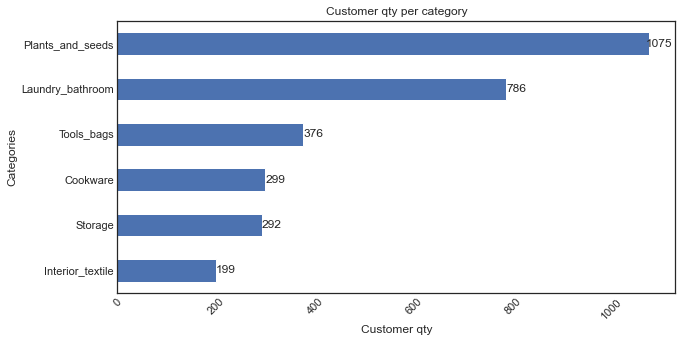

In [46]:
plt.style.use('seaborn-white')
ax = e_comm_platform.groupby('categories')['customer_id'].nunique().sort_values(ascending=True).plot(kind='barh',legend=False, grid=False, figsize=(10,5))

# add values on barchart
for p in ax.patches:
    ax.annotate(round(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
plt.xlabel('Customer qty')
plt.ylabel('Categories')  
plt.title('Customer qty per category')  
plt.xticks(rotation=45)
plt.show()

Same picture - leading Plans and seeds, and category - Laundry and bathroom.

### 3.4 Create customer profiles.

- average order ticket per customer, order qty per customer, average products name in order per customer and average product price for creating clustering

In [47]:
# average order ticket per customer
avg_ticket = e_comm_platform.groupby('customer_id').agg({'order_id': 'nunique', 'turnover': 'sum'}).reset_index()
avg_ticket.columns = ['customer_id','total_orders', 'total_turnover']
avg_ticket['avg_order_value'] = avg_ticket['total_turnover'] / avg_ticket['total_orders']

avg_ticket.head()

,customer_id,total_orders,total_turnover,avg_order_value
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,2324.0


In [48]:
# order qty per customer
order_cnt_per_customer = e_comm_platform.groupby('customer_id').agg({'order_id': 'nunique'}).reset_index()
order_cnt_per_customer.columns = ['customer_id','order_cnt_per_cust']
order_cnt_per_customer.head()

,customer_id,order_cnt_per_cust
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1
1,001cee7f-0b29-4716-b202-0042213ab038,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1


In [49]:
# merging 2 tables which consist 2 metrics for KMeans method
customers_profiles = avg_ticket.merge(order_cnt_per_customer, on='customer_id')
customers_profiles.head()

,customer_id,total_orders,total_turnover,avg_order_value,order_cnt_per_cust
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0,555.0,1
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,914.0,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,2324.0,1


In [50]:
# average products name in order per customer
avg_products_cnt = e_comm_platform.groupby('customer_id').agg({'order_id': 'nunique', 'product': 'nunique'}).reset_index()
avg_products_cnt.columns = ['customer_id','total_orders', 'products_cnt']
avg_products_cnt['avg_products_units'] = avg_products_cnt['products_cnt'] / avg_ticket['total_orders']
# remove columns woth total orders and products name qty per order
avg_products_cnt = avg_products_cnt.drop(columns = ['total_orders','products_cnt'],axis=1)
avg_products_cnt

,customer_id,avg_products_units
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4.0
1,001cee7f-0b29-4716-b202-0042213ab038,1.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1.0
...,...,...
2396,ff601403-b094-4b86-9ac6-264d725b9277,1.0
2397,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1.0
2398,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1.0
2399,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1.0


In [51]:
customers_profiles = customers_profiles.merge(avg_products_cnt, on='customer_id')
customers_profiles.head()

,customer_id,total_orders,total_turnover,avg_order_value,order_cnt_per_cust,avg_products_units
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0,555.0,1,4.0
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,1,1.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,914.0,1,1.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,1,1.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,2324.0,1,1.0


In [52]:
# average product price per customer
avg_price = e_comm_platform.groupby('customer_id').agg({'quantity': 'sum', 'turnover': 'sum'}).reset_index()
avg_price.columns = ['customer_id','total_quantity', 'total_turnover']
avg_price['avg_price_per_cust'] = avg_price['total_turnover'] / avg_price['total_quantity']
# remove total qty and total turnover columns
avg_price = avg_price.drop(columns = ['total_quantity','total_turnover'],axis=1)
avg_price.head()

,customer_id,avg_price_per_cust
0,000d6849-084e-4d9f-ac03-37174eaf60c4,138.75
1,001cee7f-0b29-4716-b202-0042213ab038,442.00
2,00299f34-5385-4d13-9aea-c80b81658e1b,457.00
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.00
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1162.00


In [53]:
customers_profiles = customers_profiles.merge(avg_price, on='customer_id')
customers_profiles.head()

,customer_id,total_orders,total_turnover,avg_order_value,order_cnt_per_cust,avg_products_units,avg_price_per_cust
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0,555.0,1,4.0,138.75
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,1,1.0,442.00
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,914.0,1,1.0,457.00
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,1,1.0,1649.00
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,2324.0,1,1.0,1162.00


In [54]:
# remove useless columns and launching Kmeans method of clustering
customers_profiles = customers_profiles.drop(columns = ['total_orders','total_turnover'],axis=1)
customers_profiles.head()

,customer_id,avg_order_value,order_cnt_per_cust,avg_products_units,avg_price_per_cust
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0,1,4.0,138.75
1,001cee7f-0b29-4716-b202-0042213ab038,442.0,1,1.0,442.00
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0,1,1.0,457.00
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0,1,1.0,1649.00
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0,1,1.0,1162.00


### 3.5 Launch clustering of customer profiles by Kmeans method, adding clusters to initial dataframe

In [55]:
# standardize data
scaler = StandardScaler()
X_sc = scaler.fit_transform(customers_profiles.drop(columns = ['customer_id']))

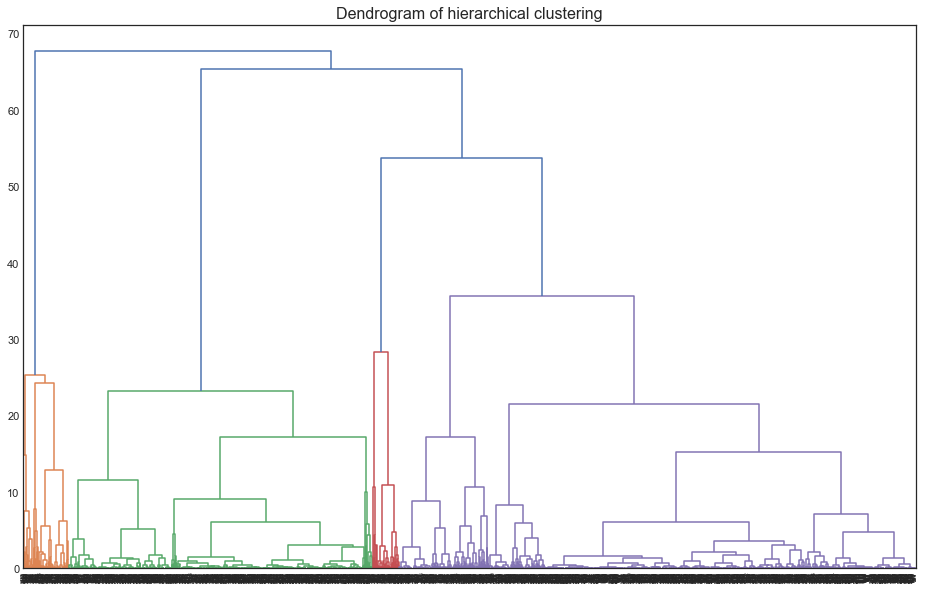

In [56]:
# visualize dendrogram
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(16, 10))  
dendrogram(linked, orientation='top')
plt.title('Dendrogram of hierarchical clustering', fontsize=16)
plt.show()

In [57]:
# forecasting customer clusters
km = KMeans(n_clusters = 4, random_state = 0, n_init=10) # apply 4 clusters (as shown at dendogram)
labels = km.fit_predict(X_sc)

In [58]:
customers_profiles['cluster'] = labels
customers_profiles.head()

,customer_id,avg_order_value,order_cnt_per_cust,avg_products_units,avg_price_per_cust,cluster
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0,1,4.0,138.75,1
1,001cee7f-0b29-4716-b202-0042213ab038,442.0,1,1.0,442.00,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0,1,1.0,457.00,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0,1,1.0,1649.00,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0,1,1.0,1162.00,1


In [59]:
# look at customer distribution per cluster
customers_profiles.groupby('cluster')['customer_id'].nunique().to_frame()

,customer_id
cluster,
0,205
1,1308
2,804
3,84


Most customers was distributed to 1 cluster - 1308. Guess most of customers did only 1 order.

In [60]:
# look at average metrics per cluster
customers_profiles.groupby('cluster').mean()

,avg_order_value,order_cnt_per_cust,avg_products_units,avg_price_per_cust
cluster,,,,
0,4292.646748,1.317073,1.104878,3071.217538
1,787.917049,1.000000,1.448777,433.868650
2,676.954829,2.037313,1.069844,609.566994
3,1753.511905,1.047619,13.672619,113.232877


- Cluster 1 has avg ticket - 788 rub., order frequency - 1. 
- Cluster 0 - avg ticket - 4292 rub., order frequency - 1.3 times. 
- Cluster 2 - avg ticket 677 rub., order frequency 2. 
- Cluster 3- avg ticket 1753 rub., order frequency 1.

In [61]:
# add clusters to initial dataset
e_comm_platform = e_comm_platform.merge(customers_profiles, on='customer_id')
e_comm_platform = e_comm_platform.drop(columns = ['avg_order_value','order_cnt_per_cust', 'avg_products_units', 'avg_price_per_cust'],axis=1)
e_comm_platform.head()

,date,customer_id,order_id,product,quantity,price,month,turnover,categories,cluster
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,142.0,Plants_and_seeds,1
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,194.0,Cookware,1
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,112.0,Plants_and_seeds,1
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,179.0,Plants_and_seeds,1
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,112.0,Plants_and_seeds,1


### 3.6 Look at revenue, order qty and customers dynamic by product categories

#### 3.6.1 Look at avg order ticket by product categories

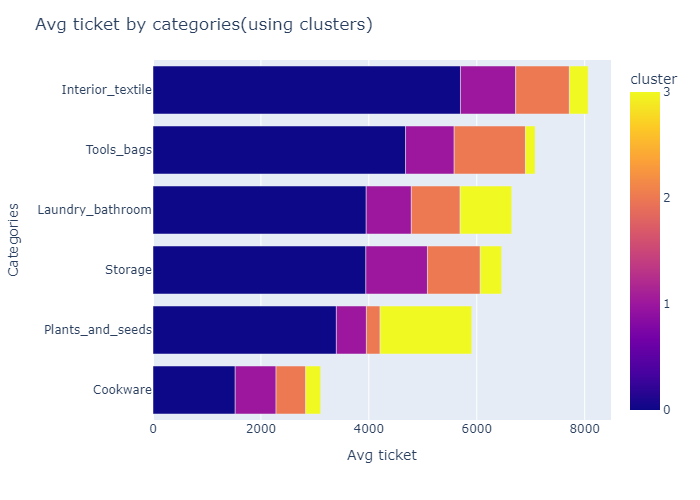

In [62]:
avg_ticket_per_categories = e_comm_platform.groupby(['categories','cluster']).agg({'order_id': 'nunique', 'turnover': 'sum'}).reset_index()
avg_ticket_per_categories.columns = ['categories','cluster','order_id_cnt', 'sum_turnover']
avg_ticket_per_categories['avg_ticket_size'] = avg_ticket_per_categories['sum_turnover']/avg_ticket_per_categories['order_id_cnt']

fig = px.bar(avg_ticket_per_categories,
             x='avg_ticket_size',
             y='categories',
             color='cluster'
            )

fig.update_layout(title = 'Avg ticket by categories(using clusters)',
                  xaxis_title = 'Avg ticket',
                  yaxis_title = 'Categories',
                  yaxis={'categoryorder': 'total ascending'},
                  legend_title_text='cluster',
                  coloraxis_colorbar=dict(tickmode='array', tickvals=[0, 1, 2, 3, 4], ticktext=['0', '1', '2', '3', '4'])
                
)

fig.show("png")

Highest average ticket is in Interior and textiles category has 0 cluster, in second place - Tools and bags also in 0 cluster.

#### 3.6.2 Look at product qty by categories

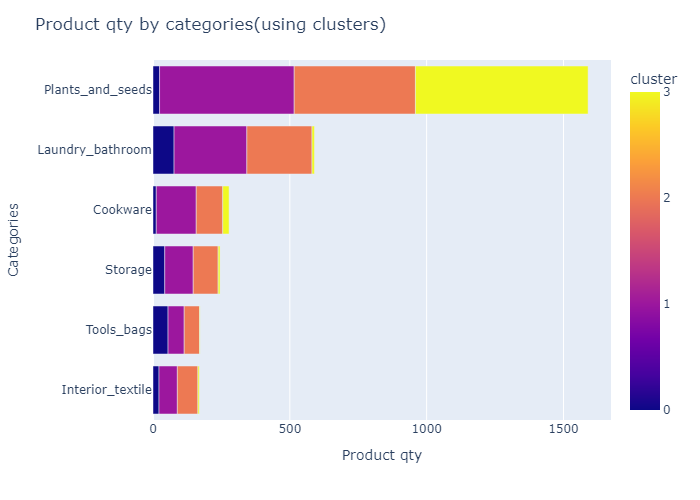

In [63]:
product_cnt_per_categories = e_comm_platform.groupby(['categories','cluster']).agg({'product': 'nunique',}).reset_index()
product_cnt_per_categories.columns = ['categories','cluster','order_cnt']


fig = px.bar(product_cnt_per_categories,
             x='order_cnt',
             y='categories',
             color='cluster'
            )

fig.update_layout(title = 'Product qty by categories(using clusters)',
                  xaxis_title = 'Product qty',
                  yaxis_title = 'Categories',
                  yaxis={'categoryorder': 'total ascending'},
                  legend_title_text='cluster',
                  coloraxis_colorbar=dict(tickmode='array', tickvals=[0, 1, 2, 3, 4], ticktext=['0', '1', '2', '3', '4'])
)


fig.show("png")

Most of products are in Plants and seeds category and covering all clusters, most orders were made by cluster 3 - 631.

#### 3.6.3 Calculate total revenue and total sold pcs

In [64]:
# create dataset by grouping data by categories and clusters
top_cat = e_comm_platform.groupby(['categories','cluster']).agg({'turnover': 'sum', 'quantity': 'sum'}).reset_index()
top_cat.columns = ['categories', 'cluster','total_amount', 'total_items']
top_cat.sort_values(by='total_amount', ascending=False, inplace=True)
top_cat

,categories,cluster,total_amount,total_items
10,Laundry_bathroom,2,406185.666667,551
20,Tools_bags,0,402509.500000,94
8,Laundry_bathroom,0,347746.000000,346
13,Plants_and_seeds,1,285049.500000,2770
9,Laundry_bathroom,1,281693.000000,991
22,Tools_bags,2,210052.750000,162
16,Storage,0,177529.000000,582
14,Plants_and_seeds,2,159773.166667,1277
15,Plants_and_seeds,3,144362.000000,1451
18,Storage,2,138929.333333,206


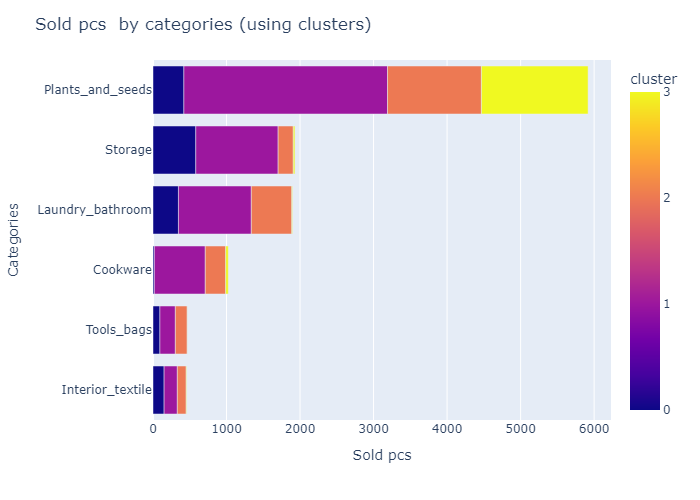

In [65]:
# categories by sold pcs, by ascending
top_cat_sorted = top_cat.sort_values(by='cluster', ascending=True)

fig = px.bar(top_cat_sorted,
             x='total_items',
             y='categories',
             color='cluster'
            )

fig.update_layout(title = 'Sold pcs  by categories (using clusters)',
                  xaxis_title = 'Sold pcs',
                  yaxis_title = 'Categories',
                  yaxis={'categoryorder': 'total ascending'},
                  legend_title_text='cluster',
                  coloraxis_colorbar=dict(tickmode='array', tickvals=[0, 1, 2, 3, 4], ticktext=['0', '1', '2', '3', '4'])
)

fig.show("png")

High-selling category in pcs is Plants and seeds - around 6000 pcs. Vast majority is from cluster 1.

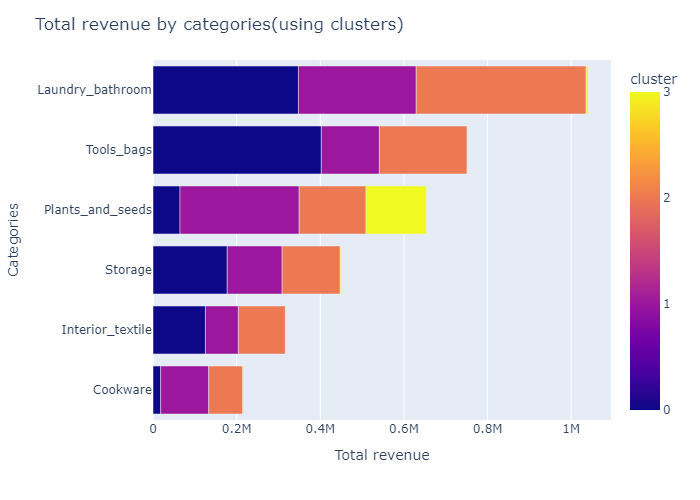

In [66]:
# categories by revenue, by ascending
fig = px.bar(top_cat_sorted,
             x='total_amount',
             y='categories',
             color='cluster'
            )

fig.update_layout(title = 'Total revenue by categories(using clusters)',
                  xaxis_title = 'Total revenue',
                  yaxis_title = 'Categories',
                  yaxis={'categoryorder': 'total ascending'},
                  legend_title_text='cluster',
                  coloraxis_colorbar=dict(tickmode='array', tickvals=[0, 1, 2, 3, 4], ticktext=['0', '1', '2', '3', '4'])
)

fig.show("png")

Graph shows that main part of revenue comes from category For cleaning and bathroom - around 1.2 million rub. Cluster 2 creates most money in this category. Tools category - 0 cluster, which create main part of revenue, since Tools category is one of the most expensive. Cluster 1 is leader in revenue for category of Plants and seeds.

#### 3.6.4 Look at revenue dynamic by categories

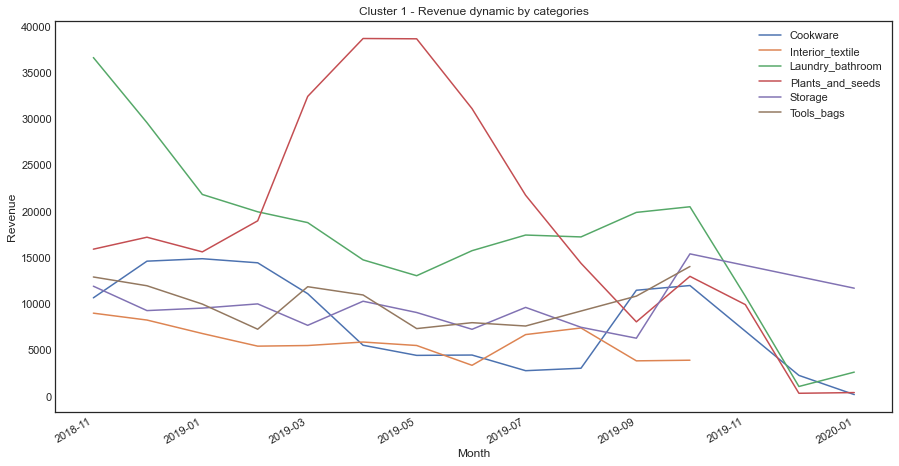

In [67]:
# query only cluster == 1
cluster1_data = e_comm_platform.query('cluster == 1')

# create plot
plt.figure(figsize=(10, 6))

# create cycle for plotting each line
for category, data in cluster1_data.groupby('categories'):
    # calculate moving average with window size - 2 
    smoothed_data = data.groupby('month')['turnover'].sum().rolling(window=2).mean()
    # plotting line for smoothing data
    smoothed_data.plot(label=category, figsize=(15, 8))


# setting axis and legend labels
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Cluster 1 - Revenue dynamic by categories')
plt.legend()
plt.gca().set_facecolor('white')
plt.show()

We have majority of users in `cluster 1` - 1308. You can see that highest revenue is generated by the category of `Plants and seeds` in the period from February to June - high season of the category. 2nd place - category `Cleaning and bathroom` - category started well in October 2018, then fell in revenue and did not regain its position (there may be an issue in pricing and assortment). `Cookware` category had a peak in revenue at the end of 2018, but then fell sharply and never regained their positions, perhapsthere are same issues as for `Cleaning and bathroom` category. All categories, except Plants and seeds, show seasonality.

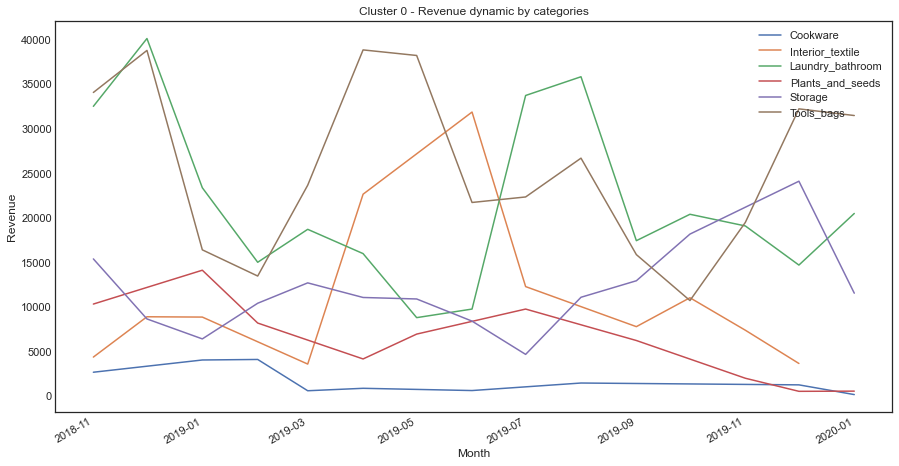

In [68]:
# query only cluster == 0
cluster0_data = e_comm_platform.query('cluster == 0')

# create plot
plt.figure(figsize=(10, 6))

# create cycle for plotting each line
for category, data in cluster0_data.groupby('categories'):
    # calculate moving average with window size - 2 
    smoothed_data = data.groupby('month')['turnover'].sum().rolling(window=2).mean()
    # plotting line for smoothing data
    smoothed_data.plot(label=category, figsize=(15, 8))

# setting axis and legend labels
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Cluster 0 - Revenue dynamic by categories')
plt.legend()
plt.gca().set_facecolor('white')
plt.show()

In `cluster 0`, `Cleaning` and `Tools` categories are leaders in revenue. These categories shows order frecuency is on one order per 4-5 months. Perhaps this situation connects to weak assortment, pricing policy of this category should not influence, as average ticket for `cluster 0` is high.

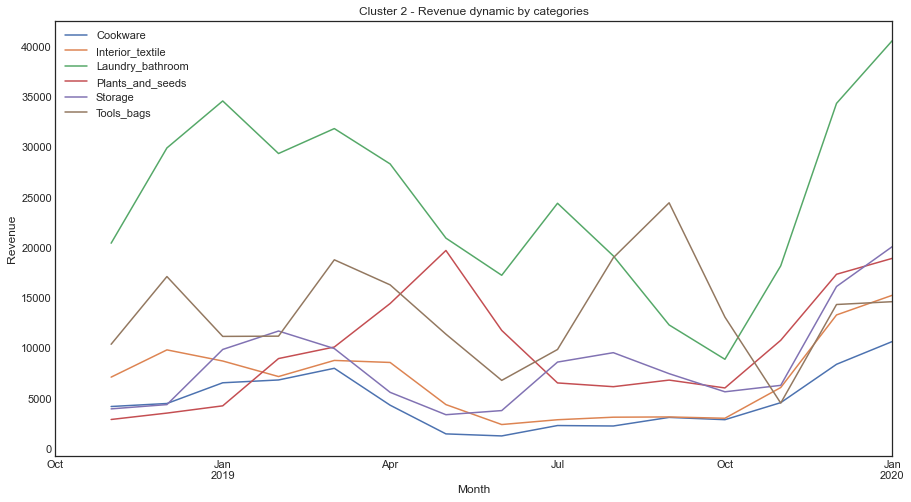

In [69]:
# query only cluster == 2
cluster2_data = e_comm_platform.query('cluster == 2')

# create plot
plt.figure(figsize=(10, 6))

# create cycle for plotting each line
for category, data in cluster2_data.groupby('categories'):
    # calculate moving average with window size - 2 
    smoothed_data = data.groupby('month')['turnover'].sum().rolling(window=2).mean()
    # plotting line for smoothing data
    smoothed_data.plot(label=category, figsize=(15, 8))

# setting axis and legend labels
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Cluster 2 - Revenue dynamic by categories')
plt.legend()
plt.gca().set_facecolor('white')
plt.show()

Most popular category in this cluster is `For cleaning and bathroom`. The category shows maximum revenue from October to April, then sharply decreasing and will regain its position also from October next year. It is difficult to say does this category have seasonality or not. Plants and seeds also show seasonality with peak in May. The Tools and Bags category is also popular.

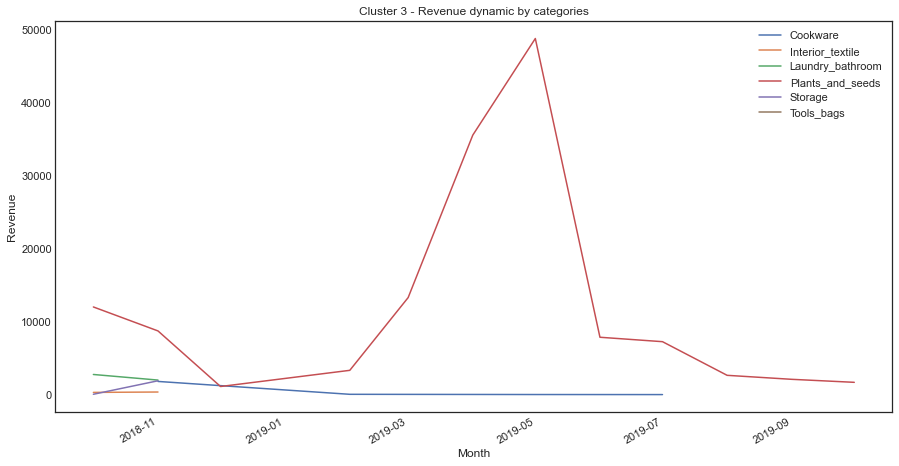

In [70]:
# query only cluster == 3
cluster3_data = e_comm_platform.query('cluster == 3')

# create plot
plt.figure(figsize=(10, 6))

# create cycle for plotting each line
for category, data in cluster3_data.groupby('categories'):
    # calculate moving average with window size - 1
    smoothed_data = data.groupby('month')['turnover'].sum().rolling(window=1).mean()
    # plotting line for smoothing data
    smoothed_data.plot(label=category, figsize=(15, 8))

# setting axis and legend labels
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Cluster 3 - Revenue dynamic by categories')
plt.legend()
plt.gca().set_facecolor('white')
plt.show()

Vast majority concentrates at one category `Plants and seeds`. This cluster has a high average check, which means they are focused on ordering expensive home flowers, shrubs, and trees. The peak of revenue within period of March-June.

**Section summary:**

1. Based on 449 keywords, we will create 6 categories (dictionaries) for adding it to general dataset.
2. According to above chart, around 42% (1,042) out of total product qty is in category Plants and seeds, 2nd place - For cleaning and bathroom - 479 products.
3. Same picture - leading Plans and seeds, and category - Laundry and bathroom.
4. We created customer profiles with parameters - average order ticket, average products qty per order, average product price. After K Means clustering, users were assigned 4 categories -0,1,2,3.
  - Cluster 1 has avg ticket - 788 rub., order frequency - 1. 
  - Cluster 0 - avg ticket - 4292 rub., order frequency - 1.3 times. 
  - Cluster 2 - avg ticket 677 rub., order frequency 2. 
  - Cluster 3 - avg ticket 1753 rub., order frequency 1.
5. Highest average ticket is in Interior and textiles category has 0 cluster, in second place - Tools and bags also in 0 cluster.
6. Most of products are in Plants and seeds category and covering all clusters, most orders were made by cluster 3 - 631.
7. High-selling category in pcs is Plants and seeds - around 6000 pcs. Vast majority is from cluster 1.
8. Main part of revenue comes from category For cleaning and bathroom - around 1.2 million rub. Cluster 2 creates most money in this category. Tools category - 0 cluster, which create main part of revenue, since Tools category is one of the most expensive. Cluster 1 is leader in revenue for category of Plants and seeds.

9. Revenue dynamic by categories, seasonality of categories:
<div class="alert alert-success">
  <b>`cluster 1`</b>: majority of users - 1308. Highest revenue is generated by the category of `Plants and seeds` in the period from February to June - high season of the category. 2nd place - category `Cleaning and bathroom` - category started well in October 2018, then fell in revenue and did not regain its position (there may be an issue in pricing and assortment). `Cookware` category had a peak in revenue at the end of 2018, but then fell sharply and never regained their positions, perhapsthere are same issues as for `Cleaning and bathroom` category. All categories, except Plants and seeds, show seasonality.
</div>
<div class="alert alert-info">
  <b>`cluster 0`</b>: `Cleaning` and `Tools` categories are leaders in revenue. These categories shows order frecuency is on one order per 4-5 months. Perhaps this situation connects to weak assortment, pricing policy of this category should not influence, as average ticket for `cluster 0` is high.
</div>
<div class="alert alert-warning">
  <b>`cluster 2`</b>: Most popular category in this cluster is For cleaning and bathroom. The category shows maximum revenue from October to April, then sharply decreasing and will regain its position also from October next year. It is difficult to say does this category have seasonality or not. Plants and seeds also show seasonality with peak in May. The Tools and Bags category is also popular.
</div>
<div class="alert alert-danger">
  <b>`cluster 3`</b>: Vast majority concentrates at one category Plants and seeds. This cluster has a high average check, which means they are focused on ordering expensive home flowers, shrubs, and trees. The peak of revenue within period of March-June.
</div>

## 4. Testing statistical hypotheses of equality between average tickets, product price among clusters

H_0: There are no statistically significant differences in average ticket between customer clusters.

H_1: There are statistically significant differences in average ticket between customer clusters.

alpha = 0.05

In [71]:
# assigning variables by cluster
cluster_0 = customers_profiles.query('cluster==0')['avg_order_value']
cluster_1 = customers_profiles.query('cluster==1')['avg_order_value']
cluster_2 = customers_profiles.query('cluster==2')['avg_order_value']
cluster_3 = customers_profiles.query('cluster==3')['avg_order_value']

In [72]:
# conducting Mann-Whitney test, since the dataset has  'tail' in average ticket

alpha = 0.05 

clusters = [cluster_0, cluster_1, cluster_2, cluster_3]
cluster_list = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3']

# introducing Shidak correction due to multiple testings (clusters number is more than 2)
shidak_alpha = alpha / (len(clusters) * (len(clusters) - 1) / 2)

for index_0 in range(len(clusters)):
    for index_1 in range(index_0+1, len(clusters)):
        p_value = st.mannwhitneyu(clusters[index_0], clusters[index_1], alternative='two-sided')[1]

        print('Clusters', cluster_list[index_0], cluster_list[index_1])
        print('p_value: {:.3f}'.format(p_value))
        print('Avg ticket group A: {:.0f}'.format(clusters[index_0].mean()))
        print('Avg ticket group B: {:.0f}'.format(clusters[index_1].mean()))
        
        if p_value < shidak_alpha:
            print('\033[31m' + 'Reject null hypothesis: here is statistically significant difference\n'+ '\033[0m')
        else:
            print('\033[32m' + 'Null hypothesis could not be rejected, here is no statistically significant difference\n'+ '\033[0m')

Clusters cluster_0 cluster_1
p_value: 0.000
Avg ticket group A: 4293
Avg ticket group B: 788
Reject null hypothesis: here is statistically significant difference

Clusters cluster_0 cluster_2
p_value: 0.000
Avg ticket group A: 4293
Avg ticket group B: 677
Reject null hypothesis: here is statistically significant difference

Clusters cluster_0 cluster_3
p_value: 0.000
Avg ticket group A: 4293
Avg ticket group B: 1754
Reject null hypothesis: here is statistically significant difference

Clusters cluster_1 cluster_2
p_value: 0.026
Avg ticket group A: 788
Avg ticket group B: 677
Null hypothesis could not be rejected, here is no statistically significant difference

Clusters cluster_1 cluster_3
p_value: 0.000
Avg ticket group A: 788
Avg ticket group B: 1754
Reject null hypothesis: here is statistically significant difference

Clusters cluster_2 cluster_3
p_value: 0.000
Avg ticket group A: 677
Avg ticket group B: 1754
Reject null hypothesis: here is statistically significant difference



Statistically significant difference between average tickets was found for all cases, except pair clusters 1 and 2. Most likely, the statistical significance was not found in this case due to similar average tickets.
We will conduct additional test for avg product price.

**Creating 2nd pair of hipotheses:**  

H_0: There are no statistically significant differences in average product price between customer clusters.

H_1: There are statistically significant differences in average product price between customer clusters.

alpha = 0.05

In [73]:
# assigning variables by cluster
cluster_0_orders = customers_profiles.query('cluster==0')['avg_price_per_cust']
cluster_1_orders = customers_profiles.query('cluster==1')['avg_price_per_cust']
cluster_2_orders = customers_profiles.query('cluster==2')['avg_price_per_cust']
cluster_3_orders = customers_profiles.query('cluster==3')['avg_price_per_cust']

In [74]:
# conducting Mann-Whitney test, since the dataset has  'tail' in average product price

alpha = 0.05

clusters = [cluster_0_orders, cluster_1_orders, cluster_2_orders, cluster_3_orders]
cluster_list = ['cluster_0_orders', 'cluster_1_orders', 'cluster_2_orders', 'cluster_3_orders']

# introducing Shidak correction due to multiple testings (clusters number is more than 2)
shidak_alpha = alpha / (len(clusters) * (len(clusters) - 1) / 2)

for index_0 in range(len(clusters)):
    for index_1 in range(index_0+1, len(clusters)):
        p_value = st.mannwhitneyu(clusters[index_0], clusters[index_1], alternative='two-sided')[1]

        print('Clusters', cluster_list[index_0], cluster_list[index_1])
        print('p_value: {:.3f}'.format(p_value))
        print('Avg product price A: {:.0f}'.format(clusters[index_0].mean()))
        print('Avg product price B: {:.0f}'.format(clusters[index_1].mean()))
        
        if p_value < shidak_alpha:
            print('\033[31m' + 'Reject null hypothesis: here is statistically significant difference\n'+ '\033[0m')
        else:
            print('\033[32m' + 'Null hypothesis could not be rejected, here is no statistically significant difference\n'+ '\033[0m')

Clusters cluster_0_orders cluster_1_orders
p_value: 0.000
Avg product price A: 3071
Avg product price B: 434
Reject null hypothesis: here is statistically significant difference

Clusters cluster_0_orders cluster_2_orders
p_value: 0.000
Avg product price A: 3071
Avg product price B: 610
Reject null hypothesis: here is statistically significant difference

Clusters cluster_0_orders cluster_3_orders
p_value: 0.000
Avg product price A: 3071
Avg product price B: 113
Reject null hypothesis: here is statistically significant difference

Clusters cluster_1_orders cluster_2_orders
p_value: 0.000
Avg product price A: 434
Avg product price B: 610
Reject null hypothesis: here is statistically significant difference

Clusters cluster_1_orders cluster_3_orders
p_value: 0.000
Avg product price A: 434
Avg product price B: 113
Reject null hypothesis: here is statistically significant difference

Clusters cluster_2_orders cluster_3_orders
p_value: 0.000
Avg product price A: 610
Avg product price B: 113

Statistically significant difference was found in all cases. Make a decision that clustering of customers is correct.

<div style="border:solid blue 3px; padding: 20px">
    
## Main summary

**Exploratory data analysis:**

1. main part of customers placed order at once (63%), 2 orders are almost half from customer qty who made 1 order. There are 126, 35 and 17 orders placed by 1 customer, perhaps they are wholesalers and ordering on a regular basis.
2. Vast majority of orders contain one product name - 88% out of total qty of orders. Maximum number of items in order is 51, there is only one.
3. average ticket is around 1200 rubles, while 75% of percentiles have ticket up to 1300 rubles. Limit for expensive products is on 8000 rubles, but there is product worth 14 917 rubles in the dataset.
4. Best-selling product in volume is dummy Apple 9 cm red, in value - a shopping cart.
5. Outliers were removed for average check above 15,000 rubles (8 users).

**Customer segmentation by purchase history:**

1. Based on 449 keywords, we will create 6 categories (dictionaries) for adding it to general dataset.
2. According to above chart, around 42% (1,042) out of total product qty is in category Plants and seeds, 2nd place - For cleaning and bathroom - 479 products.
3. Same picture - leading Plans and seeds, and category - Laundry and bathroom.
4. We created customer profiles with parameters - average order ticket, average products qty per order, average product price. After K Means clustering, users were assigned 4 categories -0,1,2,3.
  - Cluster 1 has avg ticket - 788 rub., order frequency - 1. 
  - Cluster 0 - avg ticket - 4292 rub., order frequency - 1.3 times. 
  - Cluster 2 - avg ticket 677 rub., order frequency 2. 
  - Cluster 3 - avg ticket 1753 rub., order frequency 1.
5. Highest average ticket is in Interior and textiles category has 0 cluster, in second place - Tools and bags also in 0 cluster.
6. Most of products are in Plants and seeds category and covering all clusters, most orders were made by cluster 3 - 631.
7. High-selling category in pcs is Plants and seeds - around 6000 pcs. Vast majority is from cluster 1.
8. Main part of revenue comes from category For cleaning and bathroom - around 1.2 million rub. Cluster 2 creates most money in this category. Tools category - 0 cluster, which create main part of revenue, since Tools category is one of the most expensive. Cluster 1 is leader in revenue for category of Plants and seeds.

9. Revenue dynamic by categories, seasonality of categories:
<div class="alert alert-success">
  <b>`cluster 1`</b>: majority of users - 1308. Highest revenue is generated by the category of `Plants and seeds` in the period from February to June - high season of the category. 2nd place - category `Cleaning and bathroom` - category started well in October 2018, then fell in revenue and did not regain its position (there may be an issue in pricing and assortment). `Cookware` category had a peak in revenue at the end of 2018, but then fell sharply and never regained their positions, perhapsthere are same issues as for `Cleaning and bathroom` category. All categories, except Plants and seeds, show seasonality.
</div>
<div class="alert alert-info">
  <b>`cluster 0`</b>: `Cleaning` and `Tools` categories are leaders in revenue. These categories shows order frecuency is on one order per 4-5 months. Perhaps this situation connects to weak assortment, pricing policy of this category should not influence, as average ticket for `cluster 0` is high.
</div>
<div class="alert alert-warning">
  <b>`cluster 2`</b>: Most popular category in this cluster is For cleaning and bathroom. The category shows maximum revenue from October to April, then sharply decreasing and will regain its position also from October next year. It is difficult to say does this category have seasonality or not. Plants and seeds also show seasonality with peak in May. The Tools and Bags category is also popular.
</div>
<div class="alert alert-danger">
  <b>`cluster 3`</b>: Vast majority concentrates at one category Plants and seeds. This cluster has a high average check, which means they are focused on ordering expensive home flowers, shrubs, and trees. The peak of revenue within period of March-June.
</div>
   
**Testing statistical hypotheses of equality between:**
    
 - average tickets among clusters
 
Statistically significant difference between average tickets was found for all cases, except pair clusters 1 and 2. Most likely, the statistical significance was not found in this case due to similar average tickets.

 - average product price among clusters
 
Statistically significant difference was found in all cases. Make a decision that clustering of customers is correct.

<div style="border:solid blue 3px; padding: 20px">

## Recommendations

For the marketing department, the following recommendations can be identified for promotional mailings in the context of clusters:

1. **Cluster 1:** 

    - *Description:* here is majority of users, 1,308, average ticket of 788 rub, and average order qty - 1. 
    - *Categories and seasonality:* majority of users - 1308. Highest revenue is generated by the category of `Plants and seeds` in the period from February to June - high season of the category. 2nd place - category `Cleaning and bathroom` - category started well in October 2018, then fell in revenue and did not regain its position (there may be an issue in pricing and assortment). `Cookware` category had a peak in revenue at the end of 2018, but then fell sharply and never regained their positions, perhapsthere are same issues as for `Cleaning and bathroom` category. All categories, except Plants and seeds, show seasonality.
    - *Recommendations:* it is necessary to strengthen `Cleaning and bathroom` category, seems that problem core is in pricing policy and assortment.There is no seasonality, mailing list can be carried out at any time.

2. **Cluster 2:** 

    - *Description:* 804 users, average ticket is 677 rubl, average order qty per customer - 2. Cluster is characterized by low receipt, but highest frequency of orders.
    - *Categories and seasonality:* Most popular category in this cluster is For cleaning and bathroom. The category shows maximum revenue from October to April, then sharply decreasing and will regain its position also from October next year. It is difficult to say does this category have seasonality or not. Plants and seeds also show seasonality with peak in May. The Tools and Bags category is also popular.
    - *Recommendations:* it is necessary to strengthen category `Cleaning and bathroom`, `Household services`. Promotional mailing can be done before October for `Cleaning` and in April for Pants and seeds`. This cluster has highest purchase frequency, so there need is to increase revenue by increasing frequency of purchases, not ticket value.
    
3. **Cluster 3:** 
    - *Description:* 84 users, with an average check of 1,754 rubles, and an average number of orders - 1.
    - *Categories and seasonality:* Vast majority concentrates at one category Plants and seeds. This cluster has a high average check, which means they are focused on ordering expensive home flowers, shrubs, and trees. The peak of revenue within period of March-June.
    - *Recommendations:* we recommend sending promotional mails by category of `Plants and seeds` at the end of February, before summer season.

4. **Cluster 0:** 
    - *Description:* 205 users, average ticket is 4,293 rubles, frequency of purchases per user is 1.3.
    - *Categories and seasonality:* `Cleaning` and `Tools` categories are leaders in revenue. These categories shows order frecuency is on one order per 4-5 months. Perhaps this situation connects to weak assortment, pricing policy of this category should not influence, as average ticket for `cluster 0` is high.
    - *Recommendations:* we recommend sending promotional mails in June by `Tools` category and in September by `Cleaning` category. In general, it is necessary to strengthen these categories through an assortment changes.